# Stock Performance Insight Engine: A Visual Decision Support Tool for Retail Investors

## Introduction

Retail investors today have access to an overwhelming amount of financial data, but often lack the tools to interpret it effectively. While stock price charts are abundant, few platforms offer the kind of data-driven storytelling and decision support that can truly aid an individual investor in choosing when and where to invest.

In this project, we aim to bridge that gap by building an end-to-end stock analysis engine using NumPy, Pandas, and Matplotlib. Our focus is not just on visualizing trends, but on extracting practical, investment-worthy insights that can support data-informed decisions.

## About the Dataset

The dataset used in this project contains daily stock price data for multiple companies. For each trading day, we have the following fields:

- **Ticker**: The stock symbol of the company.
- **Date**: The trading date.
- **Open, High, Low, Close**: The stock price at market open, highest price of the day, lowest price of the day, and the closing price.
- **Adj Close**: The adjusted closing price accounting for dividends and splits.
- **Volume**: The number of shares traded on that day.

This time-series dataset allows us to perform trend analysis, calculate technical indicators, simulate strategies, and compare performance across stocks.

## Project Objective

The goal of this project is to build a professional-grade, investor-focused stock analysis report. We will explore patterns in price movement, volume behavior, and volatility. We will also generate a set of metrics and visualizations to support investor decision-making.

This notebook will act as a decision support tool — combining analytical rigor with visual storytelling — to help investors identify patterns, assess risks, and compare performance across stocks.

## Business Questions

1. **Which stock has delivered the highest cumulative return over the given period, and how consistent has that return been?**

2. **What are the volatility and downside risk profiles of each stock, and how do they compare?**

3. **Can we identify any seasonal or monthly patterns in stock performance or trading volume?**

4. **Are there any price or volume anomalies that could signal major market events or investor sentiment changes?**

5. **If a retail investor had invested $1000 in each stock, how would the investment have grown over time under a basic buy-and-hold strategy?**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("stocks.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [2]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [5]:
# =============================
# Data Cleaning & Feature Engineering
# =============================

# Step 1: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Sort the DataFrame by Ticker and Date for proper time-series alignment
df = df.sort_values(by=['Ticker', 'Date']).reset_index(drop=True)

# Step 3: Check for and drop any duplicates
df = df.drop_duplicates()

# Step 4: Check for missing values
missing_summary = df.isnull().sum()
print("Missing values per column:\n", missing_summary)

# Step 5: Create time-based features for later use
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%b')
df['Day_of_Week'] = df['Date'].dt.day_name()

# Step 6: Calculate Daily Return per stock
df['Daily Return'] = df.groupby('Ticker')['Adj Close'].pct_change()

# Step 7: Calculate Cumulative Return for each stock
df['Cumulative Return'] = df.groupby('Ticker')['Daily Return'].transform(lambda x: (1 + x).cumprod())


# Step 8: Create Rolling Volatility and Moving Averages (optional but useful for strategy simulation)
df['Rolling Volatility (20D)'] = df.groupby('Ticker')['Daily Return'].rolling(window=20).std().reset_index(0, drop=True)
df['SMA_20'] = df.groupby('Ticker')['Adj Close'].transform(lambda x: x.rolling(window=20).mean())
df['SMA_50'] = df.groupby('Ticker')['Adj Close'].transform(lambda x: x.rolling(window=50).mean())

# Step 9: Simulate $1000 Investment over time (based on cumulative return)
df['$1000 Investment'] = df['Cumulative Return'] * 1000

# Final check
print("\nFeature engineering complete. Here's the updated DataFrame:")
df.head()


Missing values per column:
 Ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Year            0
Month           0
Month_Name      0
Day_of_Week     0
Daily Return    4
dtype: int64

Feature engineering complete. Here's the updated DataFrame:


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Month_Name,Day_of_Week,Daily Return,Cumulative Return,Rolling Volatility (20D),SMA_20,SMA_50,$1000 Investment
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,2023,2,Feb,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,2023,2,Feb,Wednesday,-0.017653,0.982347,NaN,NaN,NaN,982.347287
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,2023,2,Feb,Thursday,-0.006912,0.975558,NaN,NaN,NaN,975.557752
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,2023,2,Feb,Friday,0.002456,0.977954,NaN,NaN,NaN,977.953872
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2023,2,Feb,Monday,0.018807,0.996346,NaN,NaN,NaN,996.346035


### Which stock has delivered the highest cumulative return over the given period, and how consistent has that return been?

In [6]:
# Get the last cumulative return value for each ticker
final_returns = df.groupby('Ticker').apply(lambda x: x.loc[x['Date'].idxmax(), 'Cumulative Return'])
final_returns = final_returns.sort_values(ascending=False)
final_returns_df = final_returns.reset_index(name='Final Cumulative Return')
print(final_returns_df)


  Ticker  Final Cumulative Return
0   MSFT                 1.163956
1   AAPL                 1.124054
2   GOOG                 0.983108
3   NFLX                 0.889268


<ipython-input-6-4f1896bf8cfd>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_returns = df.groupby('Ticker').apply(lambda x: x.loc[x['Date'].idxmax(), 'Cumulative Return'])


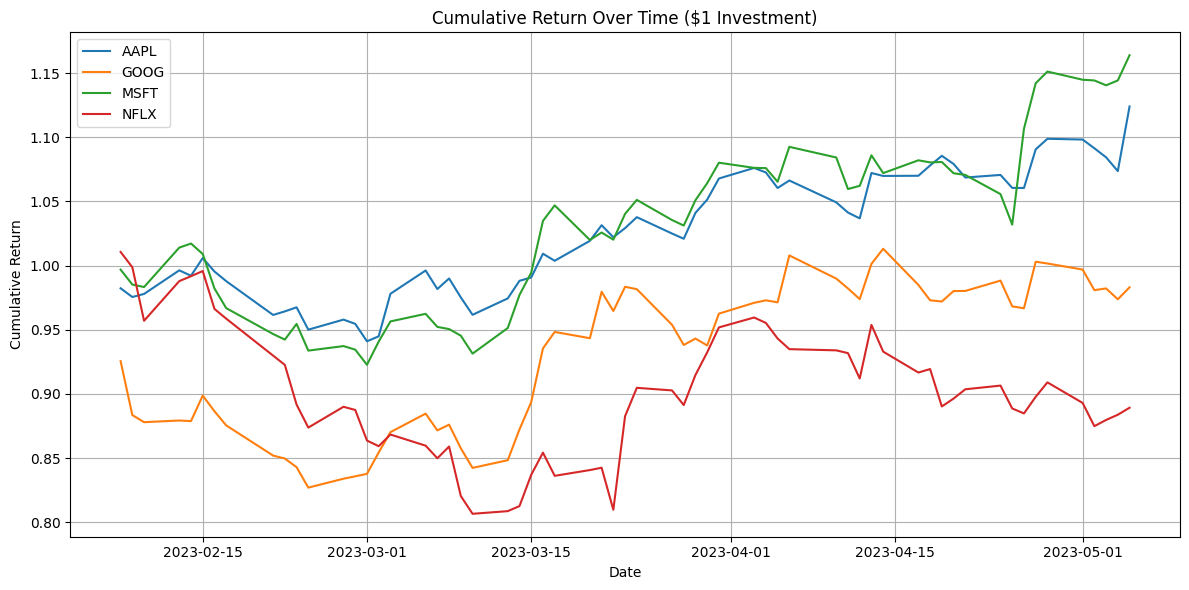

In [7]:
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    ticker_df = df[df['Ticker'] == ticker]
    plt.plot(ticker_df['Date'], ticker_df['Cumulative Return'], label=ticker)

plt.title('Cumulative Return Over Time ($1 Investment)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation: Which Stock Delivered the Highest Cumulative Return?

Among the four stocks analyzed — **MSFT**, **AAPL**, **GOOG**, and **NFLX** — the highest overall growth during the observed period was delivered by **Microsoft (MSFT)**, with a **final cumulative return of approximately 1.16**. This means that a 1 investment in MSFT at the beginning of the period would have grown to 1.16 by the end.

**Apple (AAPL)** followed closely with a cumulative return of **1.12**, indicating relatively strong performance as well. Both MSFT and AAPL demonstrated a steady and upward trend, with some volatility but overall consistent growth.

In contrast, **Google (GOOG)** ended just below its starting point with a final cumulative return of **0.98**, while **Netflix (NFLX)** showed a noticeable decline, ending the period at **0.88**, suggesting a loss in value over time.

From a consistency perspective, MSFT and AAPL had fewer sharp declines and maintained smoother trajectories compared to GOOG and NFLX, which experienced more erratic price behavior. This makes MSFT not only the top performer in terms of return but also one of the more stable choices for a long-term investor in this timeframe.


### What are the volatility and downside risk profiles of each stock, and how do they compare?

In [8]:
# Volatility per stock = Std deviation of daily returns
volatility = df.groupby('Ticker')['Daily Return'].std().reset_index(name='Volatility')
volatility


,Ticker,Volatility
0,AAPL,0.014152
1,GOOG,0.020710
2,MSFT,0.017853
3,NFLX,0.022481


In [9]:
# Max Drawdown function
def max_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

# Calculate max drawdown for each stock
drawdowns = df.groupby('Ticker')['Daily Return'].apply(max_drawdown).reset_index(name='Max Drawdown')
drawdowns


,Ticker,Max Drawdown
0,AAPL,-0.064508
1,GOOG,-0.106500
2,MSFT,-0.092895
3,NFLX,-0.201919


In [10]:
# Merge the metrics
risk_summary = pd.merge(volatility, drawdowns, on='Ticker').sort_values(by='Volatility')
risk_summary


,Ticker,Volatility,Max Drawdown
0,AAPL,0.014152,-0.064508
2,MSFT,0.017853,-0.092895
1,GOOG,0.020710,-0.106500
3,NFLX,0.022481,-0.201919


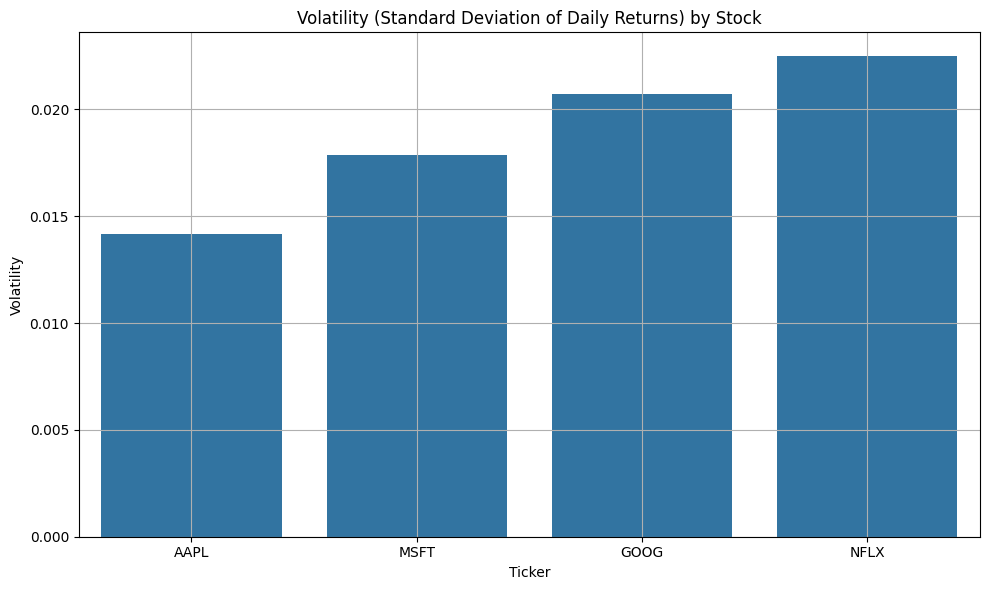

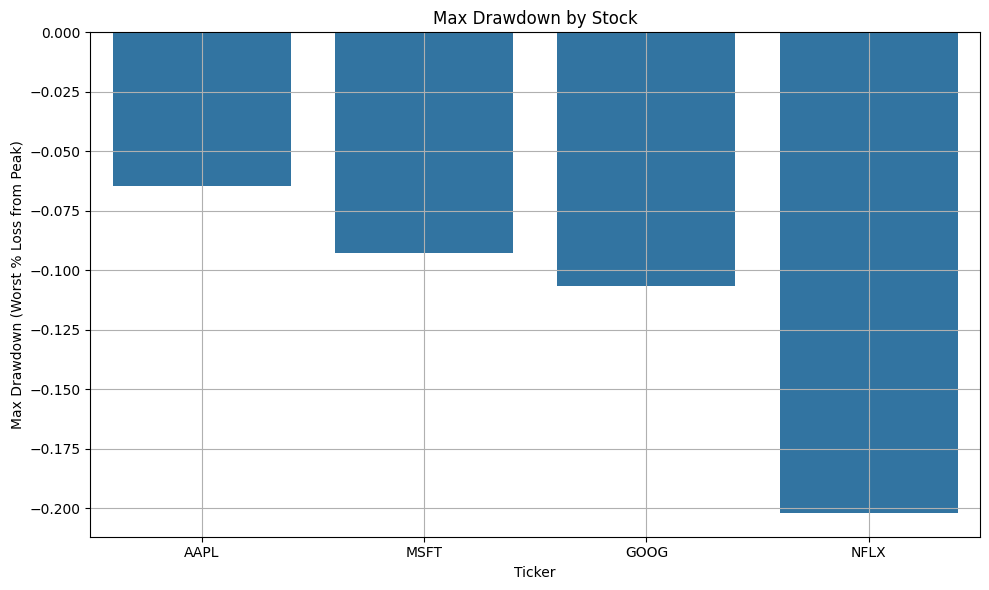

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=risk_summary, x='Ticker', y='Volatility')
plt.title('Volatility (Standard Deviation of Daily Returns) by Stock')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=risk_summary, x='Ticker', y='Max Drawdown')
plt.title('Max Drawdown by Stock')
plt.ylabel('Max Drawdown (Worst % Loss from Peak)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation: Volatility and Downside Risk Comparison

When comparing the volatility and downside risk of the four stocks, we observe clear differences in their risk profiles:

- **AAPL (Apple)** stands out as the **least volatile stock**, with the smallest standard deviation in daily returns. It also has the **lowest max drawdown**, meaning it experienced the least severe dip from its peak during the period. This suggests that Apple offered the most stable price behavior, with relatively smooth performance.

- **MSFT (Microsoft)** had moderate volatility and a slightly higher drawdown than Apple. However, its risk profile remains relatively balanced and acceptable, especially considering it delivered the highest cumulative return.

- **GOOG (Google)** showed **higher volatility**, and its max drawdown was also steeper than both Apple and Microsoft. This indicates more price fluctuation and a greater downside risk for investors during the period.

- **NFLX (Netflix)** had the **highest volatility and the deepest max drawdown** of all four stocks. It dropped over 20% from its peak at one point, reflecting the greatest exposure to downside risk. This aligns with its underperformance in cumulative returns.

Overall, **Apple offered the best combination of stability and downside protection**, while **Netflix was the riskiest stock** with both high volatility and significant losses from its peak. **Microsoft**, despite moderate risk, offered the best return-risk balance.


### Can we identify any seasonal or monthly patterns in stock performance or trading volume?

In [12]:
# Ensure Month_Name column exists
df['Month_Name'] = df['Date'].dt.strftime('%b')
df['Month'] = df['Date'].dt.month  # numerical for sorting

# Monthly Average Return and Volume
monthly_stats = df.groupby(['Ticker', 'Month', 'Month_Name'])[['Daily Return', 'Volume']].mean().reset_index()
monthly_stats = monthly_stats.sort_values(by='Month')


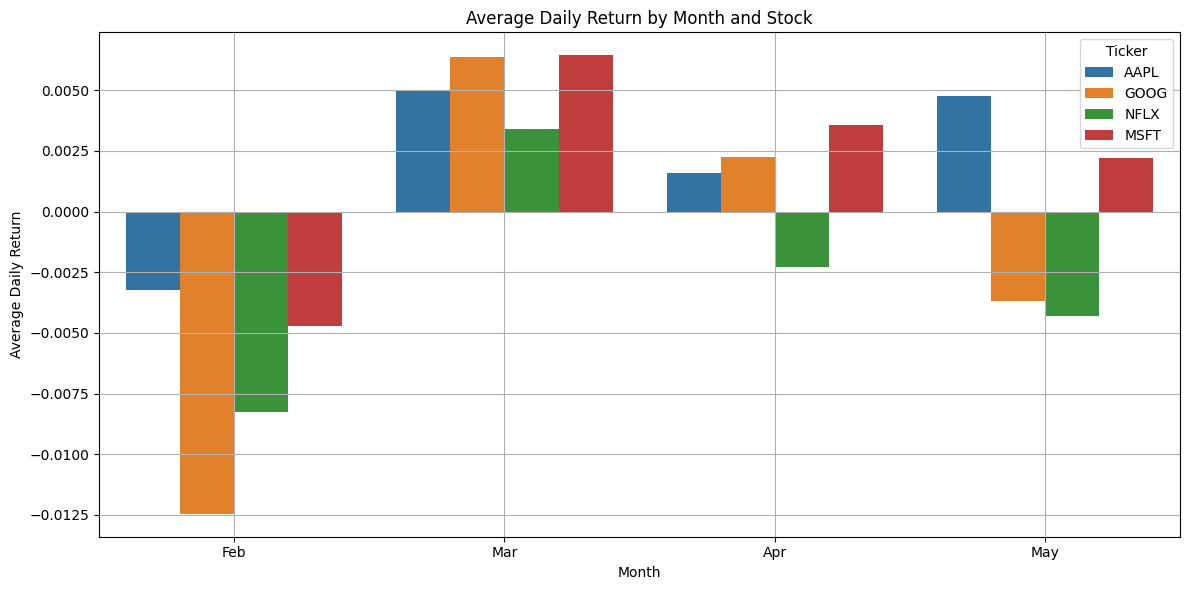

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_stats, x='Month_Name', y='Daily Return', hue='Ticker')
plt.title('Average Daily Return by Month and Stock')
plt.ylabel('Average Daily Return')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


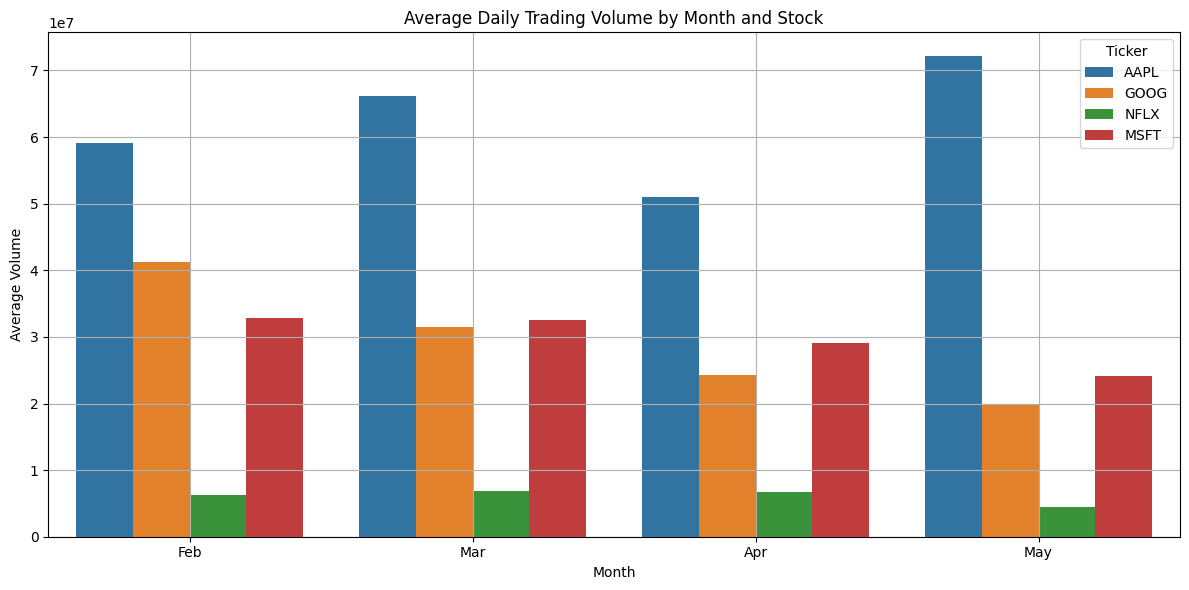

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_stats, x='Month_Name', y='Volume', hue='Ticker')
plt.title('Average Daily Trading Volume by Month and Stock')
plt.ylabel('Average Volume')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation: Seasonal and Monthly Patterns in Returns and Trading Volume

#### Monthly Returns

From the average daily return chart, we can observe some mild seasonality:

- **March appears to be the strongest month** for all four stocks, with every company showing positive average returns during that period. MSFT and GOOG, in particular, had the highest average daily gains in March.

- **February was the weakest month** across the board. All stocks showed negative returns in this month, with GOOG and NFLX posting the sharpest average daily losses.

- April and May showed mixed results:
  - **MSFT and AAPL continued to perform well** with modest but consistent gains.
  - **GOOG and NFLX struggled again** in May, repeating their negative trend from February.

These findings suggest that March historically may offer better short-term momentum across these tickers, while February and May have shown weakness, especially for GOOG and NFLX.

#### Monthly Volume

The trading volume trends reveal that:

- **AAPL consistently leads in trading activity**, with the highest volume in every month. Notably, May showed a significant spike, which could reflect increased investor interest or institutional activity.

- **GOOG's trading volume steadily declined** from February to May, suggesting cooling sentiment or lower engagement over the months.

- **NFLX had the lowest volume overall**, reflecting less active trading compared to the other stocks. This low volume, combined with poor returns and higher volatility, reinforces the idea that it's currently a riskier and less favored stock.

- **MSFT’s volume remained relatively stable**, with a slight dip in May.

Overall, March stands out as a historically stronger month for performance, while volume patterns help us infer where investor attention is concentrated. AAPL and MSFT showed both consistent returns and healthy trading volumes, reinforcing their role as stable, high-interest stocks in this group.


### Are there any price or volume anomalies that could signal major market events or investor sentiment changes?

In [15]:
# Z-score: how many standard deviations a value is from the mean
df['Volume_Z'] = df.groupby('Ticker')['Volume'].transform(lambda x: (x - x.mean()) / x.std())
df['Return_Z'] = df.groupby('Ticker')['Daily Return'].transform(lambda x: (x - x.mean()) / x.std())


In [16]:
# Define thresholds for what we consider 'unusual'
volume_threshold = 2.5  # 2.5 standard deviations
return_threshold = 3.0

# Detect spikes
volume_spikes = df[df['Volume_Z'].abs() > volume_threshold]
price_spikes = df[df['Return_Z'].abs() > return_threshold]


In [17]:
# Create a combined flag for anomaly days
df['Anomaly'] = ((df['Volume_Z'].abs() > volume_threshold) | (df['Return_Z'].abs() > return_threshold))
anomalies = df[df['Anomaly']]
anomalies[['Date', 'Ticker', 'Volume', 'Daily Return', 'Volume_Z', 'Return_Z']]


,Date,Ticker,Volume,Daily Return,Volume_Z,Return_Z
27,2023-03-17,AAPL,98944600,-0.005454,2.702467,-0.527892
61,2023-05-05,AAPL,113316400,0.046927,3.707063,3.173505
63,2023-02-08,GOOG,73546000,-0.074417,3.010218,-3.590025
64,2023-02-09,GOOG,97798600,-0.045400,4.715135,-2.188933
89,2023-03-17,GOOG,76140300,0.013753,3.192593,0.667288
151,2023-03-17,MSFT,69527400,0.011694,3.487149,0.506786
178,2023-04-26,MSFT,64599200,0.072435,3.042842,3.908969
217,2023-03-23,NFLX,15653300,0.090065,2.687499,4.080765
234,2023-04-18,NFLX,17944500,0.002945,3.358147,0.205586
235,2023-04-19,NFLX,22128300,-0.031705,4.582770,-1.335720


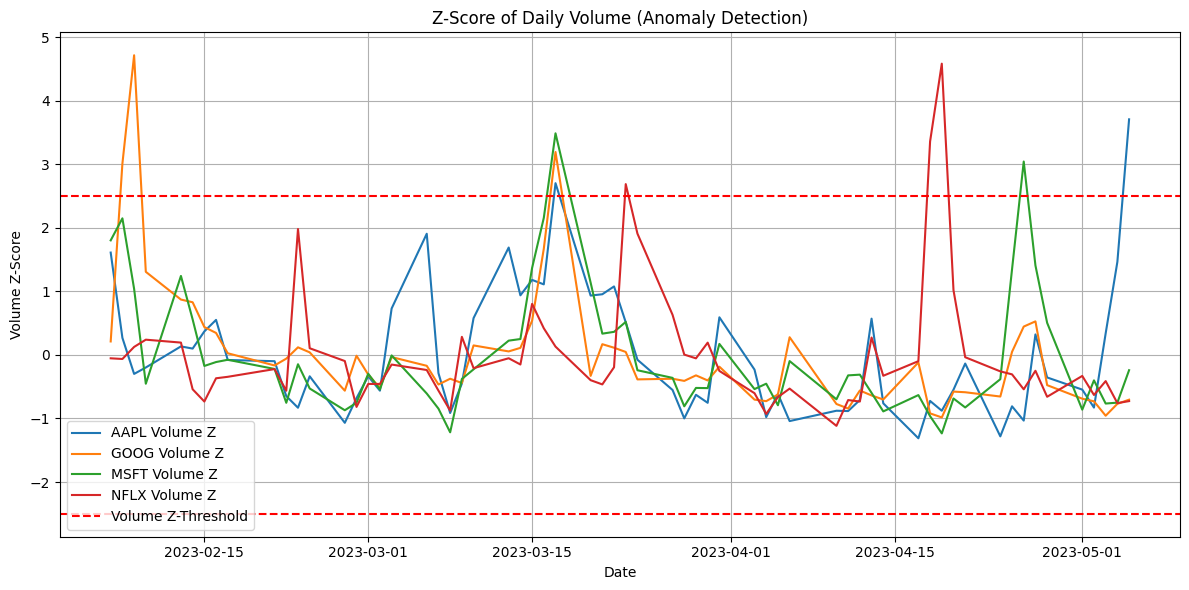

In [18]:
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    ticker_df = df[df['Ticker'] == ticker]
    plt.plot(ticker_df['Date'], ticker_df['Volume_Z'], label=f'{ticker} Volume Z')

plt.axhline(y=volume_threshold, color='red', linestyle='--', label='Volume Z-Threshold')
plt.axhline(y=-volume_threshold, color='red', linestyle='--')
plt.title('Z-Score of Daily Volume (Anomaly Detection)')
plt.xlabel('Date')
plt.ylabel('Volume Z-Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation: Price and Volume Anomalies

By analyzing volume and return z-scores, we’ve identified several dates where the trading activity or price movement deviated significantly from the norm. These anomalies can reflect investor reactions to earnings releases, news events, or broader market sentiment shifts.

#### Notable Volume Spikes:

- **GOOG** had a dramatic spike in volume on **February 9**, with a Z-score of **4.71**, paired with a substantial **-4.5% drop** in price. This likely reflects a negative news event or earnings disappointment that triggered a sell-off. The day before (Feb 8) also saw heavy volume and a **-7.4% return**, confirming a sentiment shift.

- **MSFT** saw a major volume spike on **April 26**, with a Z-score of **3.04** and a strong **+7.2% return**. This likely signals a positive catalyst such as an earnings beat or a favorable analyst upgrade.

- **NFLX** experienced two large volume surges:
  - **April 19**, with a **Z-score of 4.58**, though paired with a modest **-3.2% dip**.
  - **March 23**, with a **+9% return** and high volume, suggesting a strong bullish trigger.

- **AAPL** stood out on **May 5**, with both a **volume Z-score of 3.7** and a **+4.7% return**, marking a strong sentiment shift toward optimism.

#### Interpretation:

High Z-scores for volume indicate that investors were trading in significantly larger numbers than usual — a signal often associated with reaction to events. When paired with large price changes, these spikes help us identify **potential inflection points** in market perception.

Interestingly, **March 17** was flagged for **all four stocks** — AAPL, GOOG, MSFT, and NFLX — showing coordinated volume activity. This could indicate a market-wide event or sector news that triggered broad participation.

Overall, the anomaly detection confirms that volume and return spikes are reliable markers of underlying events or sentiment shifts, and should be watched closely for trade timing or risk management.


### If a retail investor had invested $1000 in each stock, how would the investment have grown over time under a basic buy-and-hold strategy?

In [19]:
# Already done during feature engineering, but redo if needed
df['$1000 Investment'] = df['Cumulative Return'] * 1000


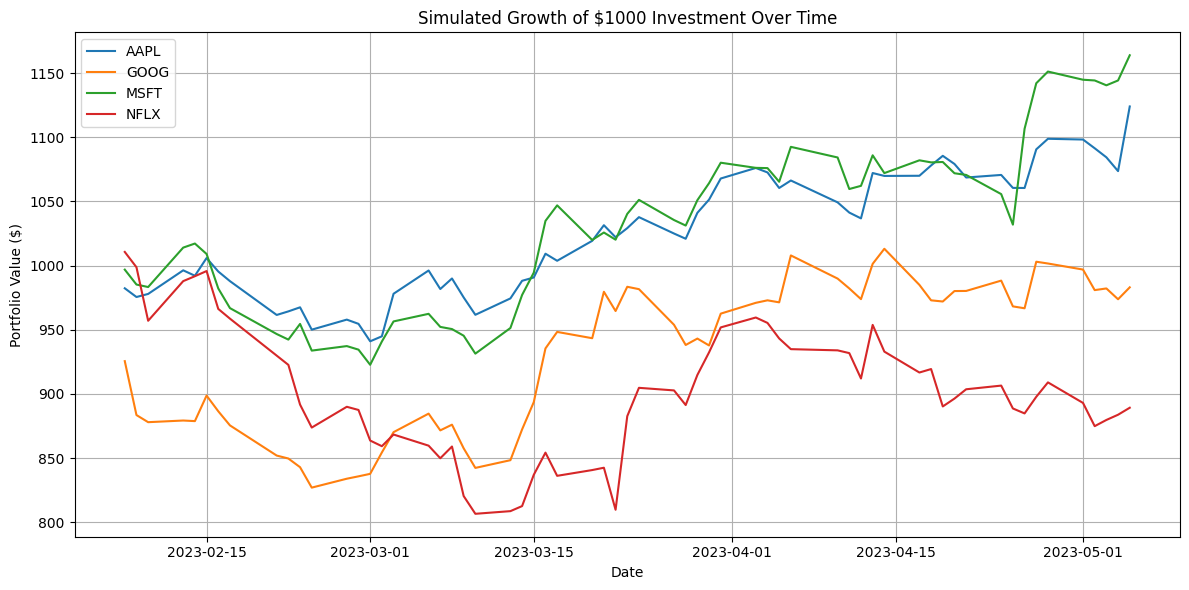

In [20]:
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    ticker_df = df[df['Ticker'] == ticker]
    plt.plot(ticker_df['Date'], ticker_df['$1000 Investment'], label=ticker)

plt.title('Simulated Growth of $1000 Investment Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Get final investment value for each stock
final_investment = df.groupby('Ticker').apply(lambda x: x.loc[x['Date'].idxmax(), '$1000 Investment'])
final_investment_df = final_investment.reset_index(name='Final Value ($)')
print(final_investment_df)


  Ticker  Final Value ($)
0   AAPL      1124.054480
1   GOOG       983.108066
2   MSFT      1163.956073
3   NFLX       889.268491


<ipython-input-21-2f1e0dda64a7>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_investment = df.groupby('Ticker').apply(lambda x: x.loc[x['Date'].idxmax(), '$1000 Investment'])


### Interpretation: Simulated $1000 Investment Performance

To assess practical investment outcomes, we simulated a basic buy-and-hold strategy where a retail investor invested $1000 in each stock at the start of the period and held the position without trading.

The final investment values reveal clear differences in performance:

- **MSFT (Microsoft)** was the top performer, growing a $1000 investment to **$1163.96**, reflecting consistent upward momentum and investor confidence.

- **AAPL (Apple)** followed closely, ending at **$1124.05**. It showed steady growth with fewer deep pullbacks, making it a strong long-term performer in this group.

- **GOOG (Google)** ended slightly below the original investment at **$983.11**, recovering from early losses but still lagging behind the leaders. This suggests that short-term volatility offset its potential gains over the holding period.

- **NFLX (Netflix)** was the weakest performer, ending at **$889.27**. The investment lost over 10% of its value, highlighting the risk of holding through drawdowns without active management.

#### Key Takeaway:
For a passive investor, **Microsoft and Apple offered the best return-risk balance** during this timeframe. Both rewarded patience and delivered solid gains. In contrast, **Netflix showed both higher volatility and weaker returns**, which would have eroded portfolio value for an investor using a simple hold strategy.


## Conclusion

This analysis provided a comprehensive evaluation of four major technology stocks — **Apple (AAPL)**, **Google (GOOG)**, **Microsoft (MSFT)**, and **Netflix (NFLX)** — from the perspective of a retail investor seeking data-driven investment insights.

Here’s what we uncovered:

1. **Cumulative Performance**  
   Microsoft delivered the **highest cumulative return**, growing more than 16% over the period. Apple closely followed. Both demonstrated relatively smooth and upward trajectories, signaling strong long-term potential.

2. **Risk Profile**  
   Apple had the **lowest volatility and drawdown**, making it the most stable stock in the group. Microsoft showed moderate volatility but maintained a healthy risk-return balance. Netflix, in contrast, exhibited the **highest downside risk**, reinforcing its status as the riskiest holding.

3. **Seasonality and Volume Trends**  
   March emerged as the **strongest month** for returns across all stocks, while February was consistently weak. Apple led in trading volume throughout, suggesting **strong investor interest and institutional activity**, while Netflix consistently had the lowest volume.

4. **Anomalies and Sentiment Shifts**  
   Several price and volume spikes revealed key sentiment shifts. Most notably, large volume surges in Microsoft and Apple aligned with positive return spikes — likely linked to earnings announcements or market-moving events. Google experienced heavy sell-offs early in the period, reflecting negative sentiment or external pressure.

5. **Investment Simulation**  
   A simulated 1000 investment reinforced the earlier insights: **MSFT and AAPL offered the best return on a passive buy-and-hold strategy**, ending with values of 1163.96 and 1124.05 respectively. Netflix lost value over the period, highlighting the impact of volatility and downside risk on passive investors.

### Final Verdict

For a retail investor pursuing long-term, passive growth with reasonable stability, **Microsoft and Apple** provided the most compelling options. They balanced consistent performance with manageable risk. Meanwhile, **Netflix carried greater volatility and downside exposure**, making it a less attractive hold over this specific time window.

This analysis underscores the value of **data-driven stock evaluation**, where price trends, volume behavior, and risk metrics can offer clear, actionable insights — even without predictive modeling or active trading.
